In [1]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Create a PDF file to store the plots
pdf_filename = "plots_output.pdf"

with PdfPages(pdf_filename) as pdf:
    for i in range(20):  # Example loop for 5 iterations
        # Generate some data for the plot
        x = [j for j in range(10)]
        y = [j ** i for j in x]
        
        # Create a plot
        plt.figure()
        plt.plot(x, y, label=f'Plot {i}')
        plt.title(f'Iteration {i}')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.legend()
        
        # Save the current plot as a page in the PDF
        pdf.savefig()
        plt.close()  # Close the current figure to avoid overlapping plots


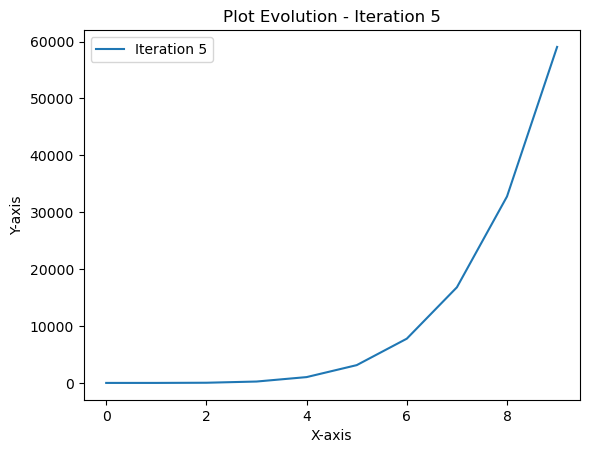

In [2]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Generate and update the plot in a loop
for i in range(1, 6):  # Example loop
    x = [j for j in range(10)]
    y = [j ** i for j in x]

    # Create and display the plot
    plt.figure()
    plt.plot(x, y, label=f'Iteration {i}')
    plt.title(f'Plot Evolution - Iteration {i}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

    time.sleep(0.05)  # Pause for 1 second
    clear_output(wait=True)  # Clear the previous plot


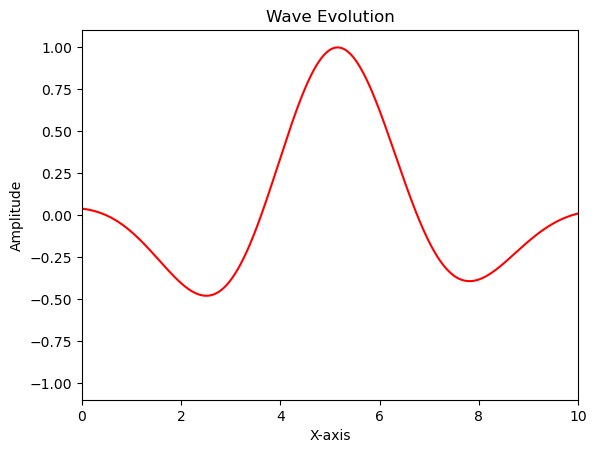

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Generate some data for demonstration (e.g., a wave-like solution)
x = np.linspace(0, 10, 500)
time_steps = 100  # Number of time steps
wave_data = [np.sin(x - 0.1 * t) * np.exp(-0.1 * (x - 5)**2) for t in range(time_steps)]

# Create the figure and axis
fig, ax = plt.subplots()
line, = ax.plot(x, wave_data[0], color='red')

# Set plot limits
ax.set_xlim(0, 10)
ax.set_ylim(-1.1, 1.1)
ax.set_title("Wave Evolution")
ax.set_xlabel("X-axis")
ax.set_ylabel("Amplitude")

# Update function for the animation
def update(frame):
    line.set_ydata(wave_data[frame])  # Update the y-data of the line
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=time_steps, interval=50, blit=True)

# Display the animation in the notebook
HTML(ani.to_jshtml())


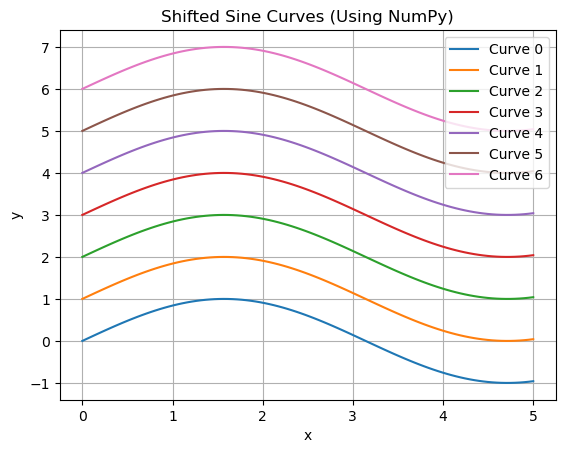

In [4]:
import numpy as np

# Define the x-axis for the sine curve
x = np.linspace(0, 5, 100)  # 100 points between 0 and 5

# Create the initial sine curve
curve = np.sin(x)

# Initialize the super array (a NumPy array for efficiency)
All_curves = np.zeros((7, len(x)))  # Preallocate space for 7 curves (n = 0 to 6)

# Loop through values of n and shift the curve vertically
for n in range(7):  # n = 0 to 6
    All_curves[n] = curve + n  # Shift curve upwards by n

# Plot all curves
for n in range(All_curves.shape[0]):  # Loop through rows of All_curves
    plt.plot(x, All_curves[n], label=f"Curve {n}")

# Add labels and legend
plt.title("Shifted Sine Curves (Using NumPy)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


In [5]:
import numpy as np

# Define the matrix
A = np.array([
    [2, -1, 0, 0],
    [-1, 2, -1, 0],
    [0, -1, 2, -1],
    [0, 0, -1, 1]
])

# Extract diagonals
main_diagonal = np.diag(A)       # Main diagonal
super_diagonal = np.diag(A, k=1) # Super-diagonal
sub_diagonal =   np.diag(A, k=-1)  # Sub-diagonal

sub_diagonal = np.insert(sub_diagonal, 0, 0)
super_diagonal = np.append(super_diagonal, 0)

# Print results
print("Main Diagonal:", main_diagonal)
print("Super-Diagonal:", super_diagonal)
print("Sub-Diagonal:", sub_diagonal)

Main Diagonal: [2 2 2 1]
Super-Diagonal: [-1 -1 -1  0]
Sub-Diagonal: [ 0 -1 -1 -1]


In [6]:
# implementation of thomas algorithm to speed up the processing of tridiagonal matrices.
def thomas(A,d):
    """ A is the tridiagnonal coefficient matrix and d is the RHS matrix"""
    
    # Extraction of the diagonal, sub and super diagonal elements into arrays for further computations
    # Extract diagonals
    b = np.diag(A)       # Main diagonal
    c = np.diag(A, k=1) # Super-diagonal
    a =   np.diag(A, k=-1)  # Sub-diagonal

    a = np.insert(a, 0, 0) # making these arrays equivalent in length to the diagonal array
    c = np.append(c, 0)
    
    
    N = len(d)
    cp = np.zeros(N,dtype='float64') # store tranformed c or c'
    dp = np.zeros(N,dtype='float64') # store transformed d or d'
    X = np.zeros(N,dtype='float64') # store unknown coefficients
    
    # Perform Forward Sweep
    # Equation 1 indexed as 0 in python
    cp[0] = c[0]/b[0]  
    dp[0] = d[0]/b[0]
    # Equation 2, ..., N (indexed 1 - N-1 in Python)
    for i in np.arange(1,(N),1):
        dnum = b[i] - a[i]*cp[i-1]
        cp[i] = c[i]/dnum
        dp[i] = (d[i]-a[i]*dp[i-1])/dnum
    
    # Perform Back Substitution
    X[(N-1)] = dp[N-1]  # Obtain last xn 

    for i in np.arange((N-2),-1,-1):  # use x[i+1] to obtain x[i]
        X[i] = (dp[i]) - (cp[i])*(X[i+1])
    
    return(X)

# Define the matrix
A = np.array([
        [3, 2, 0, 0],
        [2, 3, 2, 0],
        [0, 2, 3, 2],
        [0, 0, 2, 3]
    ])

d = np.array([5, 5, 10, 15])

print(thomas(A,d))

[ 3.18181818 -2.27272727  2.72727273  3.18181818]


In [10]:
# defining the spatial grid, 6001 steps
x_s = -30
x_e = 30
N_x = 6000
x = np.zeros(N_x+1)
dx = (x_e-x_s)/N_x
for i in range(0, N_x+1):
    x[i] = x_s + i*dx
    
x1 = np.arange(x_s, x_e+dx, dx)

np.allclose(x, x1)

True

In [7]:
import numpy as np

A1 = np.load('matrix1.npy')
A2 = np.load('matrix2.npy')

v1 = np.load('v1.npy')
v2 = np.load('v2.npy')

print(np.allclose(v1, v2))
# print(np.allclose(np.diag(A1, k=0), np.diag(A2, k=0)))

False
